# Signal Background Preparation

In [223]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [224]:
plt.style.use('seaborn-v0_8-paper')
plt.rcParams["patch.force_edgecolor"] = False
# increse font size numbers on the axes
plt.rcParams.update({'xtick.labelsize': 18})
plt.rcParams.update({'ytick.labelsize': 18})

#figure size, the label are cutted when i save the figure
plt.rcParams.update({'figure.figsize': (6, 4)})
plt.rcParams.update({'font.size': 16})

#increase size if the labels
plt.rcParams.update({'axes.labelsize': 18})

#increase the title size
plt.rcParams.update({'axes.titlesize': 18})




#Legend
plt.rcParams.update({'legend.fontsize': 12})
plt.rcParams.update({'legend.handlelength': 2})
plt.rcParams.update({'legend.handleheight': 0.5})
plt.rcParams.update({'legend.handletextpad': 0.5})
plt.rcParams.update({'legend.labelspacing': 0.5})
plt.rcParams.update({'legend.columnspacing': 1.0})
plt.rcParams.update({'legend.edgecolor': 'black'})
plt.rcParams.update({'legend.facecolor': 'inherit'})
plt.rcParams.update({'legend.framealpha': 1})
plt.rcParams.update({'legend.edgecolor': 'inherit'})
plt.rcParams.update({'legend.shadow': False})
plt.rcParams.update({'legend.frameon': True})
plt.rcParams.update({'legend.fancybox': True})
plt.rcParams.update({'legend.numpoints': 1})
plt.rcParams.update({'legend.scatterpoints': 1})
plt.rcParams.update({'legend.markerscale': 1.0})
plt.rcParams.update({'legend.borderpad': 0.4})

## 3.1 Preparation of Data

In [225]:
signal = pd.read_csv('icecube/signal_train.csv')
background = pd.read_csv('icecube/background_train.csv')
test = pd.read_csv('icecube/test.csv')

Dimensio of the dataset

In [226]:
print("Signal shape: ", signal.shape)
print("Background shape: ", background.shape)
print("Test shape: ", test.shape)

Signal shape:  (17933, 283)
Background shape:  (18067, 283)
Test shape:  (4000, 282)


Remove all coluns not common to both signal and background

In [227]:
signal = signal[signal.columns.intersection(background.columns)]
background = background[background.columns.intersection(signal.columns)]

Remove all features that are linked with the MonteCarlo Simulato, specifically those that have those names in them:
- `Corsika`
- `Weight`
- `MC`

In [228]:
#remove all columns with 'corsica' in the name
signal = signal.loc[:,~signal.columns.str.contains('Corsika')]
background = background.loc[:,~background.columns.str.contains('Corsika')]


#remove all columns with 'Weight' in the name
signal = signal.loc[:,~signal.columns.str.contains('Weight')]
background = background.loc[:,~background.columns.str.contains('Weight')]


#remove all columns with 'MC' in the name
signal = signal.loc[:,~signal.columns.str.contains('MC')]
background = background.loc[:,~background.columns.str.contains('MC')]

#remove all columns with 'I3EventHeader' in the name
signal = signal.loc[:,~signal.columns.str.contains('I3EventHeader')]
background = background.loc[:,~background.columns.str.contains('I3EventHeader')]


#restet index
signal = signal.reset_index(drop=True)
background = background.reset_index(drop=True)

### Removing all the nan adn inf values

In [229]:
#check for nan values
print('Signal nan: ',signal.isnull().sum().sum())
print('Background nan: ',background.isnull().sum().sum())

#check for inf values
print('Signal inf: ',np.isinf(signal).sum().sum())
print('Background inf: ',np.isinf(background).sum().sum())

Signal nan:  326116
Background nan:  342631
Signal inf:  0
Background inf:  0


Here I print the numbner of nan per feature if there are any (>0)

In [230]:
#print the numbner of nan per feature in percent
list_nan_signal = signal.isnull().sum()
list_nan_background = background.isnull().sum()

list_nan_signal = list_nan_signal[list_nan_signal>0]
list_nan_background = list_nan_background[list_nan_background>0]

print('Signal nan per feature: ',list_nan_signal/signal.shape[0]*100)

Signal nan per feature:  LineFit_TT.energy                                             100.000000
LineFit_TT.length                                             100.000000
MPEFitHighNoise.energy                                        100.000000
MPEFitHighNoise.length                                        100.000000
MPEFitHighNoiseFitParams.logl                                   0.033458
MPEFitHighNoiseFitParams.rlogl                                  0.033458
MPEFitParaboloid.length                                       100.000000
MPEFit_TT.energy                                              100.000000
MPEFit_TT.length                                              100.000000
MPEFit_TTFitParams.logl                                         0.011153
MPEFit_TTFitParams.rlogl                                        0.011153
MuEXAngular4.energy                                           100.000000
MuEXAngular4.length                                           100.000000
SPEFit2Bayesian.energy    

In [231]:
print('Background nan per feature: ',list_nan_background/background.shape[0]*100)

Background nan per feature:  LineFit_TT.energy                                             100.000000
LineFit_TT.length                                             100.000000
MPEFitHighNoise.energy                                        100.000000
MPEFitHighNoise.length                                        100.000000
MPEFitParaboloid.length                                       100.000000
MPEFit_TT.x                                                     0.022140
MPEFit_TT.y                                                     0.022140
MPEFit_TT.z                                                     0.022140
MPEFit_TT.time                                                  0.022140
MPEFit_TT.zenith                                                0.022140
MPEFit_TT.azimuth                                               0.022140
MPEFit_TT.energy                                              100.000000
MPEFit_TT.length                                              100.000000
MPEFit_TTFitParams.log

Remove all the features that have 95% of nan values, *BUT CONSIDERING THE UNION OF ALL THE FEATURES*

In [232]:
mk_100nan_sig = list_nan_signal[list_nan_signal>0]/signal.shape[0]*100 > 95
mk_100nan_back = list_nan_background[list_nan_background>0]/background.shape[0]*100 > 95

In [233]:
#remove all features in the lists
signal = signal.drop(list_nan_signal[mk_100nan_sig].index, axis=1)
background = background.drop(list_nan_background[mk_100nan_back].index, axis=1)

Remove AGAIN all coluns not common to both signal and background and test

In [234]:
signal = signal[signal.columns.intersection(background.columns)]
background = background[background.columns.intersection(signal.columns)]

Check again if there are any features that are not in common in all the 3 datasets

In [235]:
CK = lambda x: print('Check success') if x == 0 else None
CK((signal.keys() != background.keys()).sum())

Check success


In [236]:
print("Signal shape: ", signal.shape)
print("Background shape: ", background.shape)

Signal shape:  (17933, 171)
Background shape:  (18067, 171)


## Filling the missing values

In [237]:
#replace nan values with the mean
signal.fillna(signal.mean(), inplace=True)
background.fillna(background.mean(), inplace=True)

In [238]:
#check for nan values
print('Signal nan: ',signal.isnull().sum().sum())
print('Background nan: ',background.isnull().sum().sum())

#check for inf values
print('Signal inf: ',np.isinf(signal).sum().sum())
print('Background inf: ',np.isinf(background).sum().sum())

Signal nan:  0
Background nan:  0
Signal inf:  0
Background inf:  0


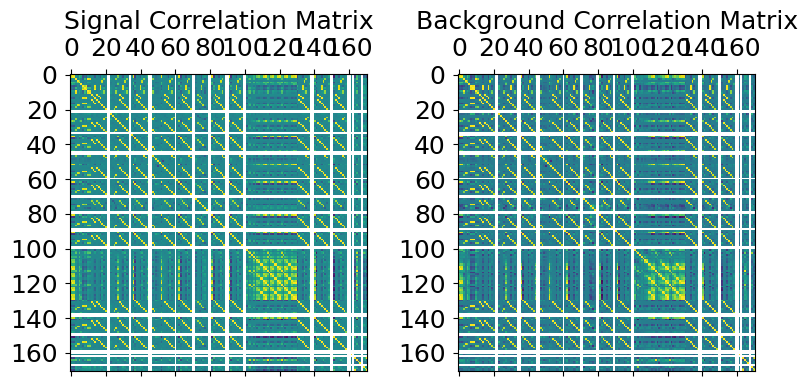

In [239]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the correlation matrix for signal
correlation_matrix = signal.corr()
axs[0].matshow(correlation_matrix)

# Plot the correlation matrix for background
correlation_matrix = background.corr()
axs[1].matshow(correlation_matrix)

# Set titles for the subplots
axs[0].set_title('Signal Correlation Matrix')
axs[1].set_title('Background Correlation Matrix')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

This is why we still see white space in the dataframes.

In [240]:
#print per every column all the possible values that that columns chan have if <10
count1 = 0
count2 = 0

for i in signal.columns:
    count1 += 1
    if len(signal[i].unique()) < 10:
        print(count1,i, signal[i].unique())

print('-------------------')

for i in background.columns:
    count2 += 1
    if len(background[i].unique()) < 10:
        print(count2,i, background[i].unique())


22 LineFit_TT.type [0.]
23 LineFit_TT.fit_status [0.]
35 MPEFitHighNoise.type [0.]
36 MPEFitHighNoise.fit_status [ 0. 30.]
46 MPEFitParaboloid.type [0.]
47 MPEFitParaboloid.fit_status [0.]
54 MPEFitParaboloidFitParams.status [ 0. 22. 20.]
61 MPEFit_TT.type [0.]
62 MPEFit_TT.fit_status [ 0. 30.]
71 MuEXAngular4.type [0.]
72 MuEXAngular4.fit_status [0.]
80 SPEFit2Bayesian.type [0.]
81 SPEFit2Bayesian.fit_status [0.]
90 SPEFit2_TT.type [0.]
91 SPEFit2_TT.fit_status [0.]
100 SplineMPE.type [0.]
101 SplineMPE.fit_status [0.]
110 SplineMPEDirectHitsA.n_early_strings [0. 1. 2. 3. 5. 4.]
118 SplineMPEDirectHitsC.n_early_strings [0. 1. 2. 3. 5. 4.]
126 SplineMPEDirectHitsE.n_early_strings [0. 1. 2. 3. 5. 4.]
139 SplineMPEMuEXDifferential.type [0.]
140 SplineMPEMuEXDifferential.fit_status [0.]
150 SplineMPETruncatedEnergy_SPICEMie_AllBINS_Muon.type [0.]
151 SplineMPETruncatedEnergy_SPICEMie_AllBINS_Muon.fit_status [0.]
160 SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.type [0.]
161 SplineMPETru

Remove all the features that have only one value

In [241]:
#remove all the features that have only one value
signal = signal.loc[:,signal.apply(pd.Series.nunique) != 1]
background = background.loc[:,background.apply(pd.Series.nunique) != 1]

In [242]:
signal = signal[signal.columns.intersection(background.columns)]
background = background[background.columns.intersection(signal.columns)]

In [243]:
#re-add the label
signal['label'] = 1
background['label'] = 0

In [244]:
#check for the shape
print('Signal shape: ',signal.shape)
print('Background shape: ',background.shape)

Signal shape:  (17933, 149)
Background shape:  (18067, 149)


In [245]:
print('Test shape: ',test.shape)

Test shape:  (4000, 282)


In [246]:
# take all the features that are in the signal and background fro the test set
test = test[test.columns.intersection(background.columns)]

In [247]:
print('Test shape: ',test.shape)

Test shape:  (4000, 148)


See below!

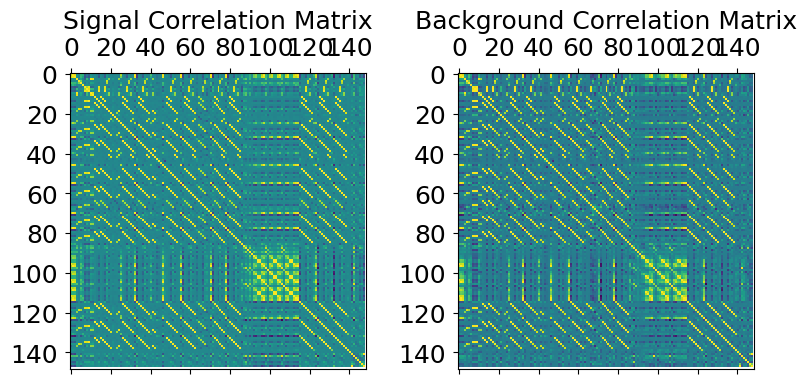

In [248]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the correlation matrix for signal
correlation_matrix = signal.corr()
axs[0].matshow(correlation_matrix)

# Plot the correlation matrix for background
correlation_matrix = background.corr()
axs[1].matshow(correlation_matrix)

# Set titles for the subplots
axs[0].set_title('Signal Correlation Matrix')
axs[1].set_title('Background Correlation Matrix')

# Adjust the spacing between subplots
plt.tight_layout()
# Display the plots
plt.show()

## 3.2 Attributes Selection

### Forward Selection

In [249]:
#merge signal and bkg
data = pd.concat([signal, background], ignore_index=True)

#randomize the data
data = data.sample(frac=1).reset_index(drop=True)

### mRMR Selection

In [250]:
from mrmr import mrmr_classif

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification

In [251]:
# Separate features and target
X = data.drop('label', axis=1)
y = data['label']

In [252]:
n_features = 15

In [253]:
# Perform mRMR selection to choose the top k features
selected_features = mrmr_classif(X=X, y=y, K=n_features)

# Display the selected features
print("Selected features using mRMR:")
print(selected_features)

# Filter the dataset to include only the selected features
data_selected = X[selected_features]
data_selected['label'] = y

100%|██████████| 15/15 [00:08<00:00,  1.70it/s]

Selected features using mRMR:
['LineFit_TTParams.lf_vel_z', 'SplineMPEDirectHitsC.n_dir_strings', 'HitStatisticsValues.z_travel', 'SplineMPEFitParams.rlogl', 'SplineMPECharacteristics.avg_dom_dist_q_tot_dom', 'SplineMPEDirectHitsA.dir_track_length', 'LineFit_TT.zenith', 'SplineMPEDirectHitsA.n_dir_strings', 'MuEXAngular4.zenith', 'NewAtt.SplineVerRadius', 'SplineMPE.zenith', 'MuEXAngular4_Sigma.value', 'SplineMPEDirectHitsA.n_dir_doms', 'MPEFitHighNoise.zenith', 'SplineMPEMuEXDifferential.zenith']


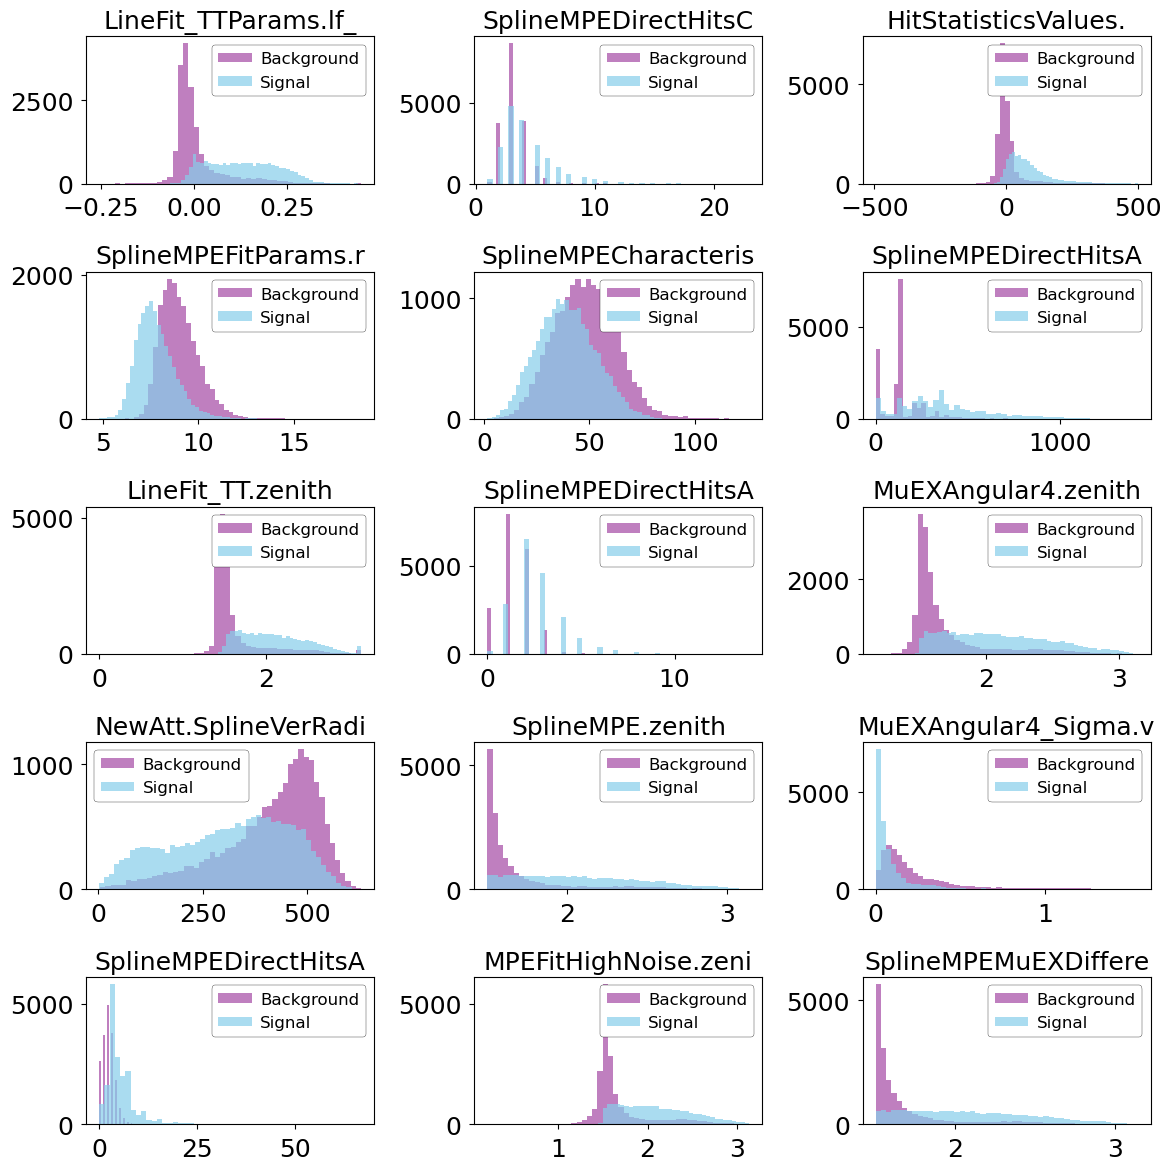

In [254]:
#create a matrix of the distribution of the features
fig, axs = plt.subplots(5, 3, figsize=(12, 12))

# Plot the distribution of the selected features
for i, feature in enumerate(selected_features):
    row = i // 3
    col = i % 3
    axs[row, col].hist(data_selected[feature][data_selected['label'] == 0], bins=50, alpha=0.5, color = 'purple', label='Background')
    axs[row, col].hist(data_selected[feature][data_selected['label'] == 1], bins=50, alpha=0.7, color = 'skyblue', label='Signal')
    axs[row, col].set_title(feature[:20])
    axs[row, col].legend()

   
# Adjust the spacing between subplots
plt.tight_layout()
# Display the plots
#save the plot
plt.savefig('Plots/feature_distribution.png')
plt.show()

Now the jaccard index analysis

In [255]:
# Jaccard index function
def jaccard_index(a, b):
    '''This function computes the Jaccard index of two sets.'''
    a = set(a)
    b = set(b)
    return len(a.intersection(b)) / len(a.union(b))


# Function to perform stability analysis
def stability_analysis(subsets):
    '''This function computes the stability score by averaging the Jaccard indices of all pairs of feature sets.'''
    ell = len(subsets)
    j_sum = 0
    count = 0
    for i in range(ell):
        for j in range(i + 1, ell):
            j_sum += jaccard_index(subsets[i], subsets[j])
            count += 1 
    return (2 / (ell * (ell - 1))) * j_sum 

#test the jaccard index with simple examples
a = ['a', 'b', 'c']
b = ['c', 'b', 'f']
print(jaccard_index(a, b))

0.5


In [256]:
# Split the dataset into 10 non-overlapping subsets
num_splits = 10
subsets = np.array_split(data_selected, num_splits)

# Perform stability analysis on the selected features with different subsets of the dataset
list_features = []

for i, data_subset in enumerate(subsets):
    selected_features_subset = data_subset.drop('label', axis=1).columns[:n_features]

    #run the mrms algorithm on those features
    selected_features_subset = mrmr_classif(X=data_subset.drop('label', axis=1), y=data_subset['label'], K=n_features)

    #print the selected features
    print(f'Selected features for subset {i + 1}:')
    print(selected_features_subset)

    #add the selected features to the list
    list_features.append(selected_features_subset)

print('Stability score:', list_features)

100%|██████████| 15/15 [00:07<00:00,  2.00it/s]

Selected features for subset 1:
['LineFit_TTParams.lf_vel_z', 'SplineMPEDirectHitsC.n_dir_strings', 'HitStatisticsValues.z_travel', 'SplineMPEFitParams.rlogl', 'LineFit_TT.zenith', 'SplineMPEDirectHitsA.n_dir_strings', 'MuEXAngular4.zenith', 'SplineMPEDirectHitsA.dir_track_length', 'MPEFitHighNoise.zenith', 'NewAtt.SplineVerRadius', 'SplineMPECharacteristics.avg_dom_dist_q_tot_dom', 'SplineMPE.zenith', 'SplineMPEDirectHitsA.n_dir_doms', 'SplineMPEMuEXDifferential.zenith', 'MuEXAngular4_Sigma.value']



100%|██████████| 15/15 [00:04<00:00,  3.63it/s]

Selected features for subset 2:
['LineFit_TTParams.lf_vel_z', 'SplineMPEDirectHitsC.n_dir_strings', 'HitStatisticsValues.z_travel', 'SplineMPEFitParams.rlogl', 'SplineMPEDirectHitsA.dir_track_length', 'LineFit_TT.zenith', 'SplineMPEDirectHitsA.n_dir_strings', 'MuEXAngular4.zenith', 'SplineMPEDirectHitsA.n_dir_doms', 'SplineMPE.zenith', 'MuEXAngular4_Sigma.value', 'SplineMPEMuEXDifferential.zenith', 'NewAtt.SplineVerRadius', 'MPEFitHighNoise.zenith', 'SplineMPECharacteristics.avg_dom_dist_q_tot_dom']



100%|██████████| 15/15 [00:03<00:00,  4.01it/s]

Selected features for subset 3:
['LineFit_TTParams.lf_vel_z', 'SplineMPEDirectHitsC.n_dir_strings', 'SplineMPECharacteristics.avg_dom_dist_q_tot_dom', 'SplineMPEFitParams.rlogl', 'HitStatisticsValues.z_travel', 'SplineMPEDirectHitsA.dir_track_length', 'LineFit_TT.zenith', 'SplineMPEDirectHitsA.n_dir_strings', 'MuEXAngular4.zenith', 'NewAtt.SplineVerRadius', 'MPEFitHighNoise.zenith', 'MuEXAngular4_Sigma.value', 'SplineMPE.zenith', 'SplineMPEDirectHitsA.n_dir_doms', 'SplineMPEMuEXDifferential.zenith']



100%|██████████| 15/15 [00:05<00:00,  2.89it/s]

Selected features for subset 4:
['LineFit_TTParams.lf_vel_z', 'SplineMPEDirectHitsC.n_dir_strings', 'HitStatisticsValues.z_travel', 'SplineMPEFitParams.rlogl', 'SplineMPECharacteristics.avg_dom_dist_q_tot_dom', 'SplineMPEDirectHitsA.dir_track_length', 'LineFit_TT.zenith', 'SplineMPEDirectHitsA.n_dir_doms', 'SplineMPEDirectHitsA.n_dir_strings', 'MuEXAngular4.zenith', 'MuEXAngular4_Sigma.value', 'SplineMPE.zenith', 'SplineMPEMuEXDifferential.zenith', 'NewAtt.SplineVerRadius', 'MPEFitHighNoise.zenith']



100%|██████████| 15/15 [00:02<00:00,  5.14it/s]

Selected features for subset 5:
['LineFit_TTParams.lf_vel_z', 'SplineMPEDirectHitsC.n_dir_strings', 'SplineMPEFitParams.rlogl', 'HitStatisticsValues.z_travel', 'SplineMPEDirectHitsA.dir_track_length', 'LineFit_TT.zenith', 'SplineMPEDirectHitsA.n_dir_strings', 'MuEXAngular4.zenith', 'MuEXAngular4_Sigma.value', 'SplineMPEDirectHitsA.n_dir_doms', 'MPEFitHighNoise.zenith', 'NewAtt.SplineVerRadius', 'SplineMPE.zenith', 'SplineMPECharacteristics.avg_dom_dist_q_tot_dom', 'SplineMPEMuEXDifferential.zenith']



100%|██████████| 15/15 [00:03<00:00,  4.90it/s]

Selected features for subset 6:
['LineFit_TTParams.lf_vel_z', 'SplineMPEDirectHitsC.n_dir_strings', 'HitStatisticsValues.z_travel', 'SplineMPEFitParams.rlogl', 'LineFit_TT.zenith', 'SplineMPEDirectHitsA.n_dir_strings', 'SplineMPEDirectHitsA.dir_track_length', 'MuEXAngular4.zenith', 'MuEXAngular4_Sigma.value', 'MPEFitHighNoise.zenith', 'SplineMPEDirectHitsA.n_dir_doms', 'SplineMPE.zenith', 'NewAtt.SplineVerRadius', 'SplineMPEMuEXDifferential.zenith', 'SplineMPECharacteristics.avg_dom_dist_q_tot_dom']



100%|██████████| 15/15 [00:02<00:00,  5.36it/s]

Selected features for subset 7:
['LineFit_TTParams.lf_vel_z', 'SplineMPEDirectHitsC.n_dir_strings', 'HitStatisticsValues.z_travel', 'SplineMPEFitParams.rlogl', 'LineFit_TT.zenith', 'SplineMPEDirectHitsA.dir_track_length', 'SplineMPECharacteristics.avg_dom_dist_q_tot_dom', 'MuEXAngular4.zenith', 'SplineMPEDirectHitsA.n_dir_strings', 'SplineMPE.zenith', 'NewAtt.SplineVerRadius', 'SplineMPEMuEXDifferential.zenith', 'SplineMPEDirectHitsA.n_dir_doms', 'MPEFitHighNoise.zenith', 'MuEXAngular4_Sigma.value']



100%|██████████| 15/15 [00:02<00:00,  5.72it/s]

Selected features for subset 8:
['LineFit_TTParams.lf_vel_z', 'SplineMPEDirectHitsC.n_dir_strings', 'HitStatisticsValues.z_travel', 'SplineMPEFitParams.rlogl', 'LineFit_TT.zenith', 'SplineMPEDirectHitsA.dir_track_length', 'SplineMPEDirectHitsA.n_dir_strings', 'MuEXAngular4.zenith', 'NewAtt.SplineVerRadius', 'SplineMPE.zenith', 'SplineMPECharacteristics.avg_dom_dist_q_tot_dom', 'SplineMPEMuEXDifferential.zenith', 'MuEXAngular4_Sigma.value', 'SplineMPEDirectHitsA.n_dir_doms', 'MPEFitHighNoise.zenith']



100%|██████████| 15/15 [00:03<00:00,  4.64it/s]

Selected features for subset 9:
['LineFit_TTParams.lf_vel_z', 'SplineMPEDirectHitsC.n_dir_strings', 'HitStatisticsValues.z_travel', 'SplineMPEFitParams.rlogl', 'SplineMPEDirectHitsA.dir_track_length', 'LineFit_TT.zenith', 'SplineMPECharacteristics.avg_dom_dist_q_tot_dom', 'SplineMPEDirectHitsA.n_dir_strings', 'MuEXAngular4.zenith', 'MuEXAngular4_Sigma.value', 'SplineMPE.zenith', 'SplineMPEDirectHitsA.n_dir_doms', 'SplineMPEMuEXDifferential.zenith', 'NewAtt.SplineVerRadius', 'MPEFitHighNoise.zenith']



100%|██████████| 15/15 [00:02<00:00,  5.18it/s]

Selected features for subset 10:
['LineFit_TTParams.lf_vel_z', 'SplineMPEDirectHitsC.n_dir_strings', 'HitStatisticsValues.z_travel', 'SplineMPEFitParams.rlogl', 'SplineMPEDirectHitsA.dir_track_length', 'LineFit_TT.zenith', 'SplineMPEDirectHitsA.n_dir_strings', 'MuEXAngular4.zenith', 'MuEXAngular4_Sigma.value', 'SplineMPE.zenith', 'SplineMPEDirectHitsA.n_dir_doms', 'SplineMPEMuEXDifferential.zenith', 'NewAtt.SplineVerRadius', 'MPEFitHighNoise.zenith', 'SplineMPECharacteristics.avg_dom_dist_q_tot_dom']
Stability score: [['LineFit_TTParams.lf_vel_z', 'SplineMPEDirectHitsC.n_dir_strings', 'HitStatisticsValues.z_travel', 'SplineMPEFitParams.rlogl', 'LineFit_TT.zenith', 'SplineMPEDirectHitsA.n_dir_strings', 'MuEXAngular4.zenith', 'SplineMPEDirectHitsA.dir_track_length', 'MPEFitHighNoise.zenith', 'NewAtt.SplineVerRadius', 'SplineMPECharacteristics.avg_dom_dist_q_tot_dom', 'SplineMPE.zenith', 'SplineMPEDirectHitsA.n_dir_doms', 'SplineMPEMuEXDifferential.zenith', 'MuEXAngular4_Sigma.value'], ['

In [257]:
# do the jaccard for all the pairs 
for i in range(len(list_features)):
    for j in range(i + 1, len(list_features)):
        print(f'Jaccard index for subsets {i + 1} and {j + 1}:', jaccard_index(list_features[i], list_features[j]))

Jaccard index for subsets 1 and 2: 1.0
Jaccard index for subsets 1 and 3: 1.0
Jaccard index for subsets 1 and 4: 1.0
Jaccard index for subsets 1 and 5: 1.0
Jaccard index for subsets 1 and 6: 1.0
Jaccard index for subsets 1 and 7: 1.0
Jaccard index for subsets 1 and 8: 1.0
Jaccard index for subsets 1 and 9: 1.0
Jaccard index for subsets 1 and 10: 1.0
Jaccard index for subsets 2 and 3: 1.0
Jaccard index for subsets 2 and 4: 1.0
Jaccard index for subsets 2 and 5: 1.0
Jaccard index for subsets 2 and 6: 1.0
Jaccard index for subsets 2 and 7: 1.0
Jaccard index for subsets 2 and 8: 1.0
Jaccard index for subsets 2 and 9: 1.0
Jaccard index for subsets 2 and 10: 1.0
Jaccard index for subsets 3 and 4: 1.0
Jaccard index for subsets 3 and 5: 1.0
Jaccard index for subsets 3 and 6: 1.0
Jaccard index for subsets 3 and 7: 1.0
Jaccard index for subsets 3 and 8: 1.0
Jaccard index for subsets 3 and 9: 1.0
Jaccard index for subsets 3 and 10: 1.0
Jaccard index for subsets 4 and 5: 1.0
Jaccard index for subs

In [258]:
# #now we can use a different number of maximum selected features
# st_scores = []
# for max_features in [5, 10, 20, 30, 40, 50]:
#     # Calculate the stability score
#     stability_score = stability_selection(X, y);
#     st_scores.append(stability_score)
#     print(f'Stability score: {stability_score:.2f}')

In [259]:
#print the selected features
print("Selected features using mRMR:")
print(selected_features)

Selected features using mRMR:
['LineFit_TTParams.lf_vel_z', 'SplineMPEDirectHitsC.n_dir_strings', 'HitStatisticsValues.z_travel', 'SplineMPEFitParams.rlogl', 'SplineMPECharacteristics.avg_dom_dist_q_tot_dom', 'SplineMPEDirectHitsA.dir_track_length', 'LineFit_TT.zenith', 'SplineMPEDirectHitsA.n_dir_strings', 'MuEXAngular4.zenith', 'NewAtt.SplineVerRadius', 'SplineMPE.zenith', 'MuEXAngular4_Sigma.value', 'SplineMPEDirectHitsA.n_dir_doms', 'MPEFitHighNoise.zenith', 'SplineMPEMuEXDifferential.zenith']


## Multivariate Models

In [260]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


Preprocess data

In [261]:
# Separate features and target
X = data.drop('label', axis=1)
y = data['label']


scaler = StandardScaler()
data_selected_scaled = scaler.fit_transform(data_selected.drop(columns=['label']))
data_selected_scaled = pd.DataFrame(data_selected_scaled, columns=data_selected.drop(columns=['label']).columns)
data_selected_scaled['label'] = data_selected['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data_selected_scaled.drop(columns=['label']), data_selected_scaled['label'], test_size=0.2, random_state=42)


# Naive Bayes Classifier

In [262]:
# Create a Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Predict the labels
y_pred = nb.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.84


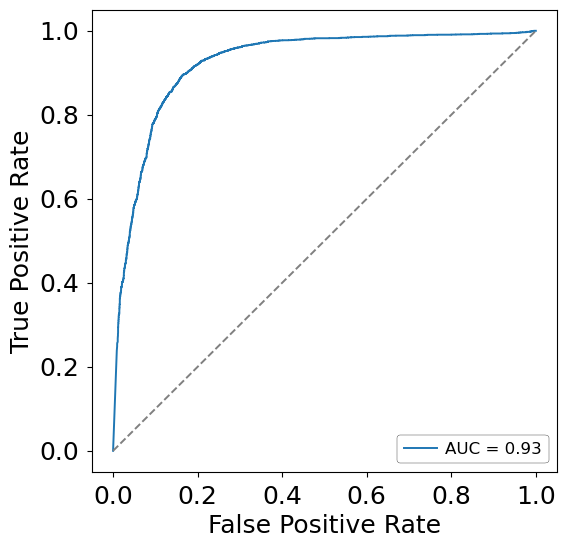

Confusion matrix:
[[3291  350]
 [ 779 2780]]


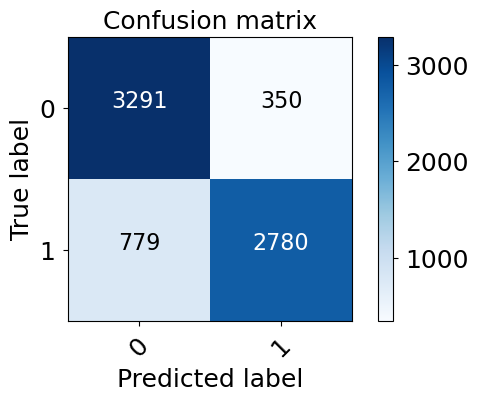

In [263]:
#plot the roc  corve#plot the roc  corve 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate the probabilities
y_prob = nb.predict_proba(X_test)[:, 1]
y_prob

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

#plot the confusion matrix
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, classes = range(2), normalize=False)
print('Confusion matrix:')
print(conf_matrix)

In [264]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## KNN


multivariate selection using knn

Cross-validation accuracy: 0.94
Accuracy: 0.94


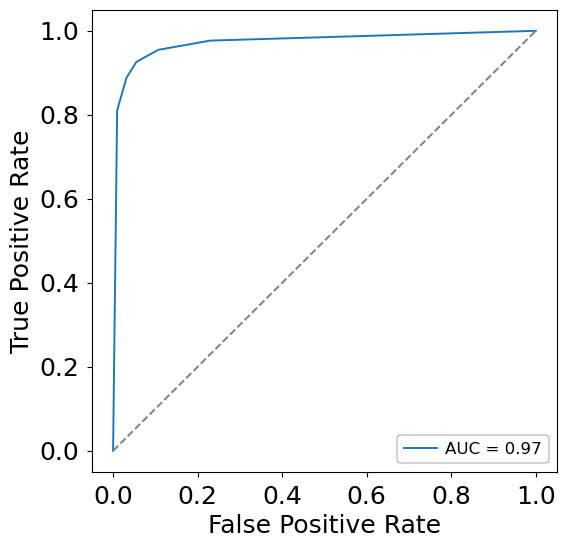

Confusion matrix:
[[3440  201]
 [ 263 3296]]


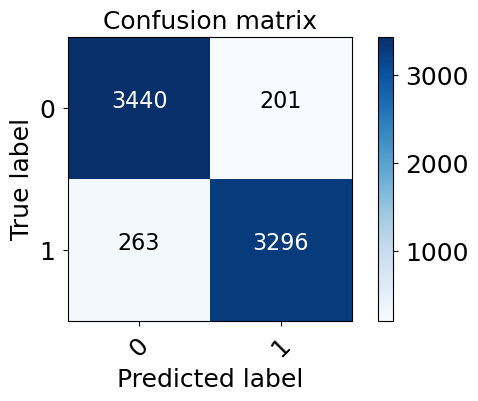

In [265]:
#kfold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import itertools  

kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=7)

# Perform cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')

# Calculate the average accuracy
cv_accuracy = cv_scores.mean()
print(f'Cross-validation accuracy: {cv_accuracy:.2f}')

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict the labels
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#plot the roc  corve#plot the roc  corve 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate the probabilities
y_prob = knn.predict_proba(X_test)[:, 1]
y_prob

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

#plot the confusion matrix
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, classes = range(2), normalize=False)
print('Confusion matrix:')
print(conf_matrix)

## Random Forest

Cross-validated accuracy: 0.9558333333333333
Accuracy: 0.95


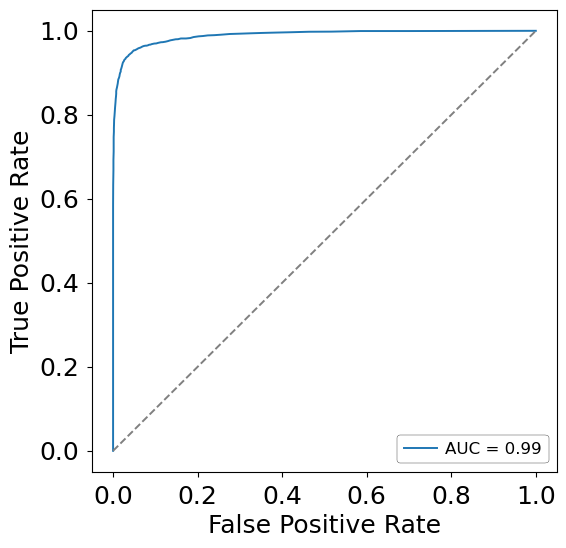

Confusion matrix:
[[3502  139]
 [ 202 3357]]


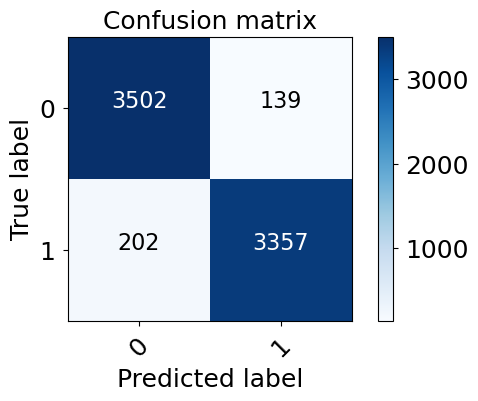

In [266]:
#kfold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)
model = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
print('Cross-validated accuracy:', scores.mean())

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


# ------------------------------------------------


#plot the roc  corve#plot the roc  corve 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate the probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

#plot the confusion matrix
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, classes = range(2), normalize=False)
print('Confusion matrix:')
print(conf_matrix)

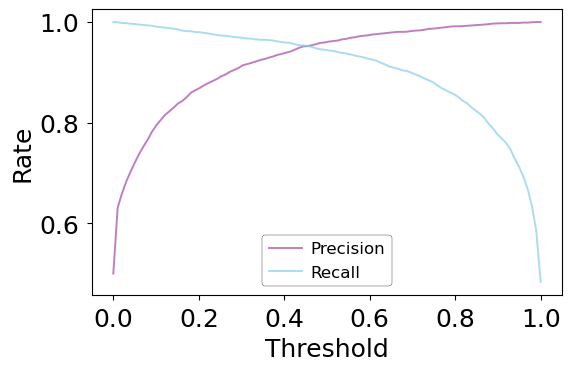

In [267]:
#do a plot. On the x axis the value pf the trashold, on the y axis different curves: the TP, TN, FP, FN
# Calculate the probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Initialize lists to store the values
thresholds = []
tpr_values = []
fpr_values = []
tnr_values = []
fnr_values = []

# Generate a range of thresholds

for threshold in np.linspace(0, 1, 100):
    y_pred = (y_prob >= threshold).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    
    # Calculate TPR and FPR
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    # Calculate TNR and FNR
    tnr = tn / (tn + fp)
    fnr = fn / (fn + tp)
    
    # Append the values to the lists
    thresholds.append(threshold)
    tpr_values.append(tpr)
    fpr_values.append(fpr)
    tnr_values.append(tnr)
    fnr_values.append(fnr)

#tranform the lists into numpy arrays
thresholds = np.array(thresholds)
tpr_values = np.array(tpr_values)
fpr_values = np.array(fpr_values)
tnr_values = np.array(tnr_values)
fnr_values = np.array(fnr_values)

# Plot the values
plt.figure(figsize=(6, 4))
#plot the precision 
plt.plot(thresholds, tpr_values/(tpr_values+fpr_values), label='Precision', color='purple', alpha=0.5)
#plot the recall
plt.plot(thresholds, tpr_values/(tpr_values+fnr_values), label='Recall', color='skyblue', alpha=0.7)

plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.legend()
plt.tight_layout()
plt.savefig('Plots/precision_recall.png')
plt.show()

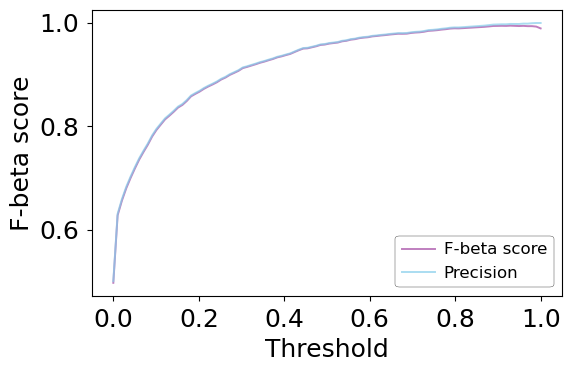

In [268]:
#compute the fBeta score with beta = 0.1
from sklearn.metrics import fbeta_score

# Initialize the lists to store the F-beta scores
fbeta_scores = []

# Calculate the F-beta score for different thresholds
for threshold in np.linspace(0, 1, 100):
    y_pred = (y_prob >= threshold).astype(int)
    fbeta = fbeta_score(y_test, y_pred, beta=0.1)
    fbeta_scores.append(fbeta)

# Plot the F-beta scores
plt.figure(figsize=(6, 4))
plt.plot(np.linspace(0, 1, 100), fbeta_scores, label='F-beta score', color='purple', alpha=0.5)
plt.plot(thresholds, tpr_values/(tpr_values+fpr_values), label='Precision', color='skyblue', alpha=0.7)
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('F-beta score')
plt.tight_layout()
plt.savefig('Plots/fbeta_score.png')
plt.show()


In [269]:
#find the mximum fbeta score
max_fbeta = np.max(fbeta_scores)
max_fbeta_threshold = thresholds[np.argmax(fbeta_scores)]
print(f'Maximum F-beta score: {max_fbeta:.2f} at threshold {max_fbeta_threshold:.2f}')

Maximum F-beta score: 0.99 at threshold 0.93


Confusion matrix:
[[3641    0]
 [1838 1721]]
Accuracy: 0.74
Precision: 1.00
Recall: 0.48
F1 score: 0.65
F-beta score: 0.99


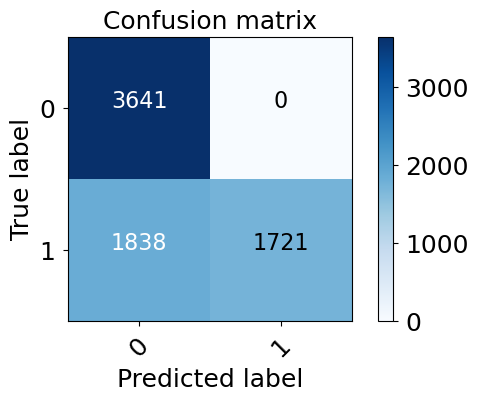

In [270]:
#select trashold to be 0.3 and calculate the confusion matrix
# Calculate the probabilities
y_pred = (y_prob >= 1).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(conf_matrix)

#compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#compute the precision
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
print(f'Precision: {precision:.2f}')

#compute the recall

recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
print(f'Recall: {recall:.2f}')

#compute the f1 score
f1 = 2 * (precision * recall) / (precision + recall)
print(f'F1 score: {f1:.2f}')

#compute the fBeta score with beta = 0.1
fbeta = fbeta_score(y_test, y_pred, beta=0.1)
print(f'F-beta score: {fbeta:.2f}')

#plot the cofusion matrix
plot_confusion_matrix(conf_matrix, classes = range(2), normalize=False)


In [271]:
# use the model to predict the test.csv file

#take just the selected features
test_scaled = test[selected_features]

# Standardize the features
test_scaled = scaler.transform(test_scaled)

# Create a DataFrame with the scaled features
test_scaled = pd.DataFrame(test_scaled, columns=selected_features)
test_scaled = test_scaled[selected_features]
#chose the threshold
threshold = 1
test_scaled['label'] = (model.predict_proba(test_scaled)[:, 1] >= threshold).astype(int)

# Save the predictions to a CSV file that contains just the 'label' column
test_scaled['label'].to_csv('predictions.csv', index=False)
test_scaled['label'][:10]

0    1
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: label, dtype: int64